In [3]:
import numpy as np
import matplotlib.pyplot as plt


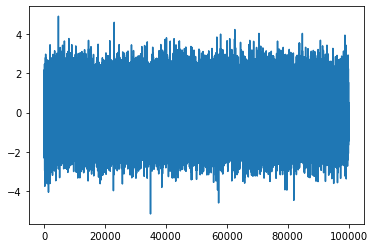

In [7]:
mean = 0
std = 1 
num_samples = 100000

noiseData = np.random.normal(mean, std, size=num_samples)

plt.plot(noiseData)


/Users/joseph/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


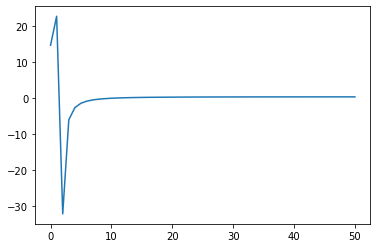

In [259]:
def genTimeData(spurFreq, 
            spurAmp,
            mean,
            std, 
            numSamples,
            sampleRate):
    
    data = np.random.normal(mean, std, size=numSamples)
    timeArr = np.asarray([i for i in range(0, numSamples)])/sampleRate
    spur = spurAmp * np.sin(2*np.pi * spurFreq * timeArr)
    return data + spur

'''
plt.plot(genTimeData(spurFreq = 299,
                     spurAmp = 1,
                     mean = 0,
                     std = 0,
                     numSamples = 100,
                     sampleRate = 600))
'''
spurFreq = 10
spurAmp = 1
mean = 0
std = 0
numSamples = 100
sampleRate = 600
timeArr = np.asarray([i for i in range(0, numSamples)])/sampleRate


fft = np.fft.rfft(genTimeData(spurFreq, 
            spurAmp,
            mean,
            std, 
            numSamples,
            sampleRate))

plt.plot( fft)


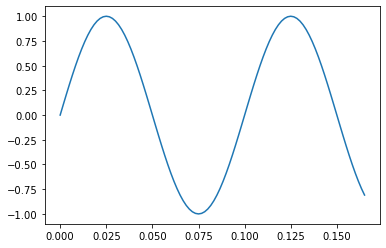

In [254]:
plt.plot(timeArr, genTimeData(spurFreq, 
            spurAmp,
            mean,
            std, 
            numSamples,
            sampleRate))

In [198]:
timeList = np.asarray([i/600e6 for i in range(0, 10)])
timeList

array([0.00000000e+00, 1.66666667e-09, 3.33333333e-09, 5.00000000e-09,
       6.66666667e-09, 8.33333333e-09, 1.00000000e-08, 1.16666667e-08,
       1.33333333e-08, 1.50000000e-08])

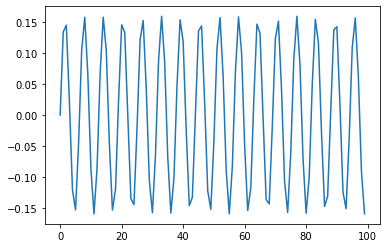

In [14]:
spur = np.sin(range(0,100))/np.pi/2
plt.plot(spur)

In [17]:
def genFreqData(spurAmp, spurIdx, numSamples):
    spurSpec = np.zeros(numSamples)
    spurSpec[spurIdx] = spurAmp
    noiseSpec = np.random.normal(mean, std, size=numSamples) 
    return noiseSpec + spurSpec

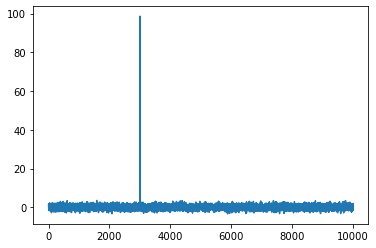

In [20]:
plt.plot(genFreqData(100, 3000, 10000))

0.009463148958140074
0.6715243904087795


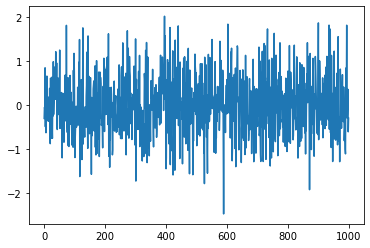

In [74]:
numAvg = 1
dataAvg = genFreqData(1, 300, 1000)
for i in range(numAvg):
    data = genFreqData(1, 300, 1000)
    dataAvg = (dataAvg + data)/2
    
plt.plot(dataAvg)
print(dataAvg.mean())
print(dataAvg.std())

In [100]:
def genAvgData(numAvg):
    spurAmp = .1
    spurIdx = 300
    numPoints = 1000

    dataAvg = genFreqData(spurAmp, spurIdx, numPoints)

    for i in range(numAvg):
        data = genFreqData(spurAmp, spurIdx, numPoints)
        dataAvg = (dataAvg + data)
    return dataAvg/numAvg
'''
plt.plot(dataAvg)
print(dataAvg.mean())
print(dataAvg.std())
'''

'\nplt.plot(dataAvg)\nprint(dataAvg.mean())\nprint(dataAvg.std())\n'

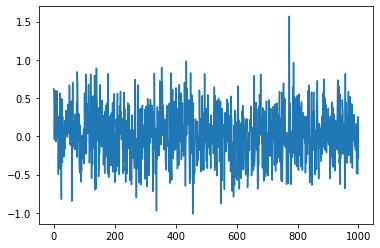

In [108]:
termData = genAvgData(10)
antennaData = genAvgData(100000)

plt.plot(termData - antennaData)

In [123]:
def genAvgData(numAvg):
    spurAmp = .1
    spurIdx = 300
    numPoints = 1000

    dataAvg = genFreqData(spurAmp, spurIdx, numPoints)

    for i in range(1, numAvg):
        data = genFreqData(spurAmp, spurIdx, numPoints)
        dataAvg = dataAvg * (i-1)/i + data/i
    return dataAvg


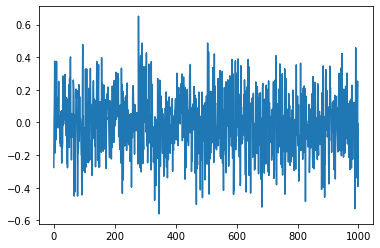

In [124]:
termData = genAvgData(30)


plt.plot(termData)

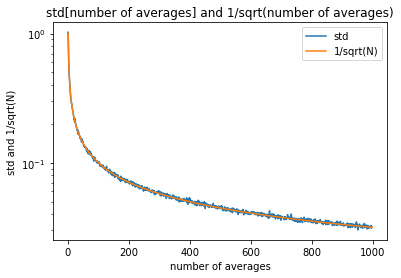

In [148]:
stdList = []
numAvgRange = range(1,1000)

for i in numAvgRange:
    stdList.append(genAvgData(i).std())

#plt.yscale('log')
plt.title('std[number of averages] and 1/sqrt(number of averages)')
plt.xlabel('number of averages')
plt.ylabel('std and 1/sqrt(N)')
plt.semilogy(stdList, label = 'std')
plt.semilogy(numAvgRange, (1/np.sqrt(numAvgRange)), label = '1/sqrt(N)')
plt.legend()



In [ ]:
sampleRate = 600e6 #Hz
samplePeriod = 1/sameleRate